# Glidertest demo 


The purpose of this notebook is to demostrate the functionality of glidertests functions. 
This notebook can be used to diagnose issues within your glider data. We have added suggested processing in some cases.

The demo notebook is roughly organised as follows:

- Load dataset
- Generate overview

And then sections divided by sensors or computed values
- CTD
- Dissolved oxygen
- Bio-optics (e.g., WETLabs)
- Photosynthetically active radiation (PAR)
- Vertical velocity (from a flight model)

At the end, we show of you can modify, add and merge the various plots in different ways.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from glidertest import fetchers
from glidertest import tools, utilities, plots
from ioos_qc import qartod

## Load dataset

Load an example dataset using `glidertest.fetchers.load_sample_dataset`

Alternatively, use your own with e.g. `ds = xr.open_dataset('/path/to/yourfile.nc')`

In [4]:
ds = fetchers.load_sample_dataset()

### Other example datasets

Several other example datasets are available, though they do not have all of the variables required to run the functions in this notebook. Uncomment lines in the following cell to use them

In [5]:
#ds = fetchers.load_sample_dataset(dataset_name="sea055_20220104T1536_delayed.nc") # Full SeaExplorer mission in the Baltic
#ds = fetchers.load_sample_dataset(dataset_name="sg015_20050213T230253_delayed.nc") # Seaglider data
#ds = fetchers.load_sample_dataset(dataset_name="sg014_20040924T182454_delayed.nc") # Full Seaglider mission in the Labrador Sea
#ds = fetchers.load_sample_dataset(dataset_name="sg014_20040924T182454_delayed_subset.nc") #Subset of a full Seaglider mission in the Labrador Sea


In [6]:
ds

<xarray.Dataset> Size: 10MB
Dimensions:                                   (N_MEASUREMENTS: 31232)
Coordinates:
    TIME                                      (N_MEASUREMENTS) datetime64[ns] 250kB ...
    LATITUDE                                  (N_MEASUREMENTS) float64 250kB ...
    LONGITUDE                                 (N_MEASUREMENTS) float64 250kB ...
    DEPTH                                     (N_MEASUREMENTS) float32 125kB ...
Dimensions without coordinates: N_MEASUREMENTS
Data variables: (12/85)
    altimeter                                 (N_MEASUREMENTS) float64 250kB ...
    BBP700                                    (N_MEASUREMENTS) float32 125kB ...
    CHLA                                      (N_MEASUREMENTS) float32 125kB ...
    CHLA_QC                                   (N_MEASUREMENTS) int8 31kB ...
    CNDC                                      (N_MEASUREMENTS) float32 125kB ...
    CNDC_QC                                   (N_MEASUREMENTS) int8 31kB ...
    ...                                        ...
    PHASE                                     (N_MEASUREMENTS) float32 125kB ...
    SENSOR_ADVS_AND_TURBULENCE_PROBES_101136  float32 4B ...
    SENSOR_CTD_205048                         float32 4B ...
    SENSOR_RADIOMETERS_2984                   float32 4B ...
    SENSOR_FLUOROMETERS_6598                  float32 4B ...
    SENSOR_DISSOLVED_GAS_SENSORS_0058         float32 4B ...
Attributes: (12/73)
    Conventions:                                CF-1.10, OG-1.0
    Metadata_Conventions:                       CF-1.6, Unidata Dataset Disco...
    acknowledgement:                            This study used data collecte...
    basin:                                      Bornholm Basin
    cdm_data_type:                              Trajectory
    comment:                                    Altitude set to 2m for the en...
    ...                                         ...
    agency_role:                                contact point
    agency_role_vocabulary:                     https://vocab.nerc.ac.uk/coll...
    data_url:                                   https://erddap.observations.v...
    rtqc_method:                                IOOS QC QARTOD https://github...
    rtqc_method_doi:                            None
    start_date:                                 2023-05-30T08:32:57.440000000

## Generate overview of dataset

This section shows plotting functions for basic statistics of the dataset.

/Users/tillmoritz/Desktop/Work/Git/glidertest/glidertest/plots.py:490: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([pd.to_datetime(t).strftime('%Y-%b-%d') for t in cbar.get_ticks()])


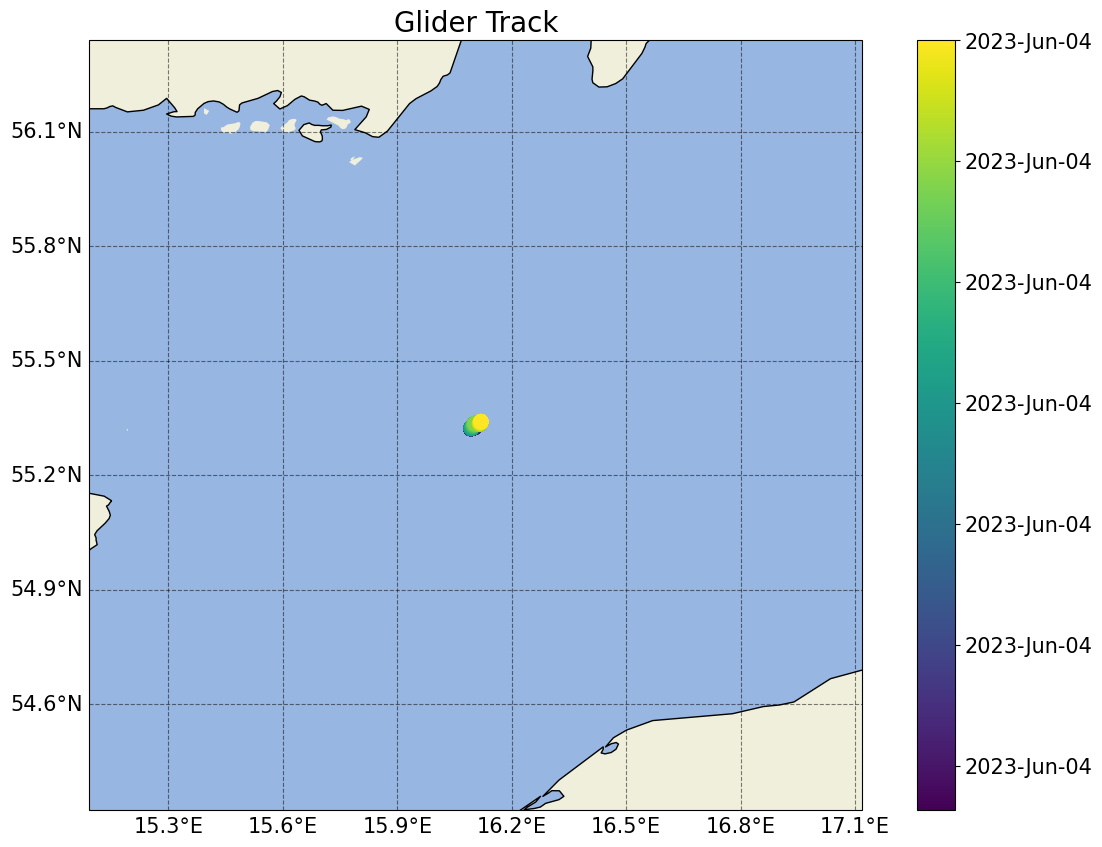

(<Figure size 1400x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Glider Track'}, xlabel='Longitude', ylabel='Latitude'>)

In [7]:
# Basic plot of the location of the dataset in space/time
plots.plot_glider_track(ds)

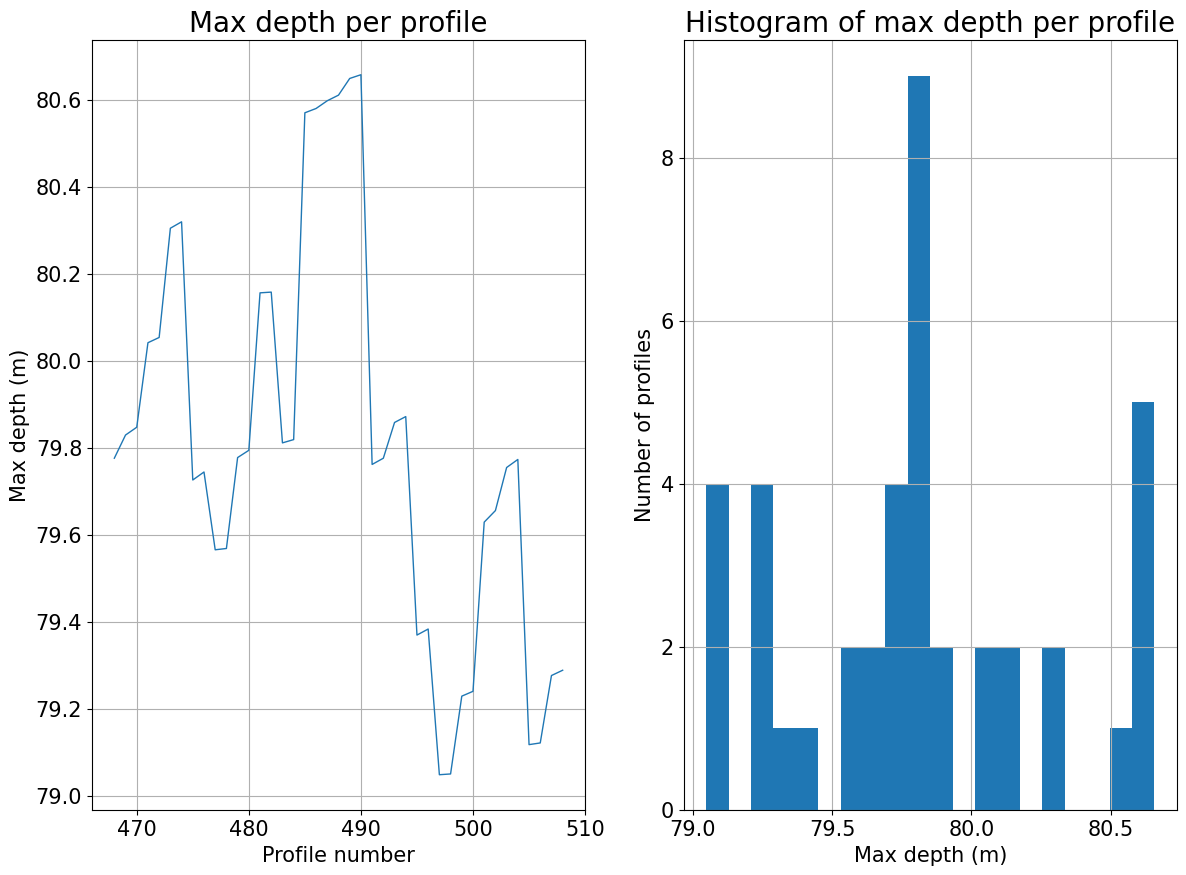

(<Figure size 1400x1000 with 2 Axes>,
 array([<Axes: title={'center': 'Max depth per profile'}, xlabel='Profile number', ylabel='Max depth (m)'>,
        <Axes: title={'center': 'Histogram of max depth per profile'}, xlabel='Max depth (m)', ylabel='Number of profiles'>],
       dtype=object))

In [8]:
# Basic plot of the maximum depth of the dataset per profile
plots.plot_max_depth_per_profile(ds)

Depth and time differences have been filtered to the middle 99% of values.
Numeric median/mean/max/min values are based on the original data.


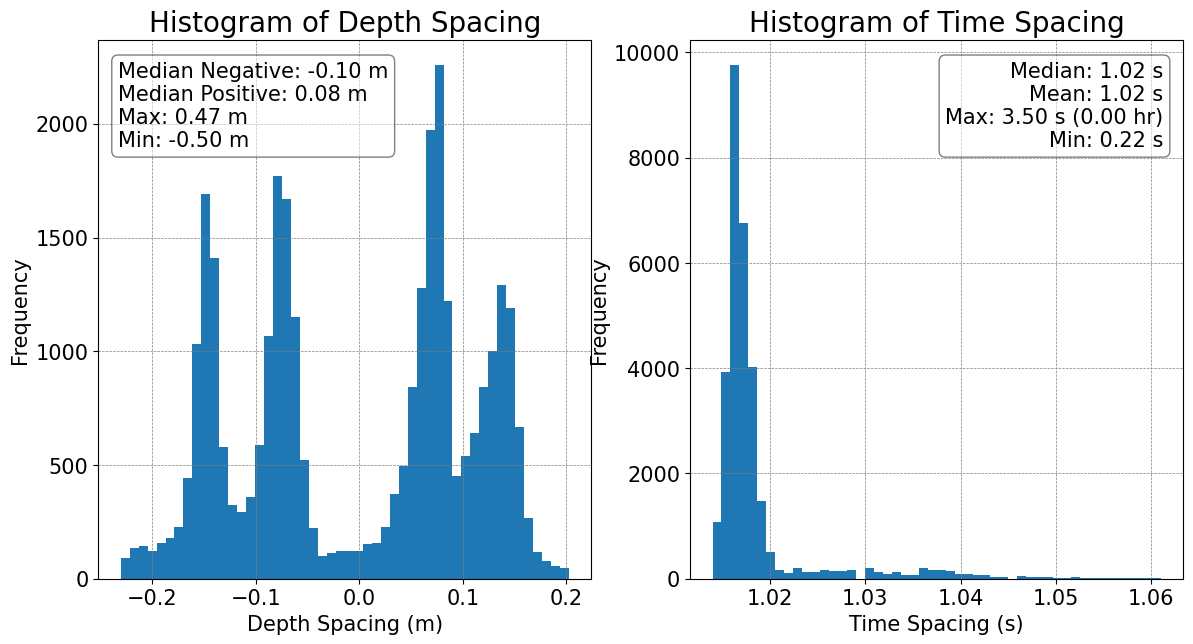

(<Figure size 1400x700 with 2 Axes>,
 array([<Axes: title={'center': 'Histogram of Depth Spacing'}, xlabel='Depth Spacing (m)', ylabel='Frequency'>,
        <Axes: title={'center': 'Histogram of Time Spacing'}, xlabel='Time Spacing (s)', ylabel='Frequency'>],
       dtype=object))

In [9]:
# Basic diagnostics of the gridding in the dataset
plots.plot_grid_spacing(ds)

Depth and time differences have been filtered to the middle 99% of values.
Numeric median/mean/max/min values are based on the original data.


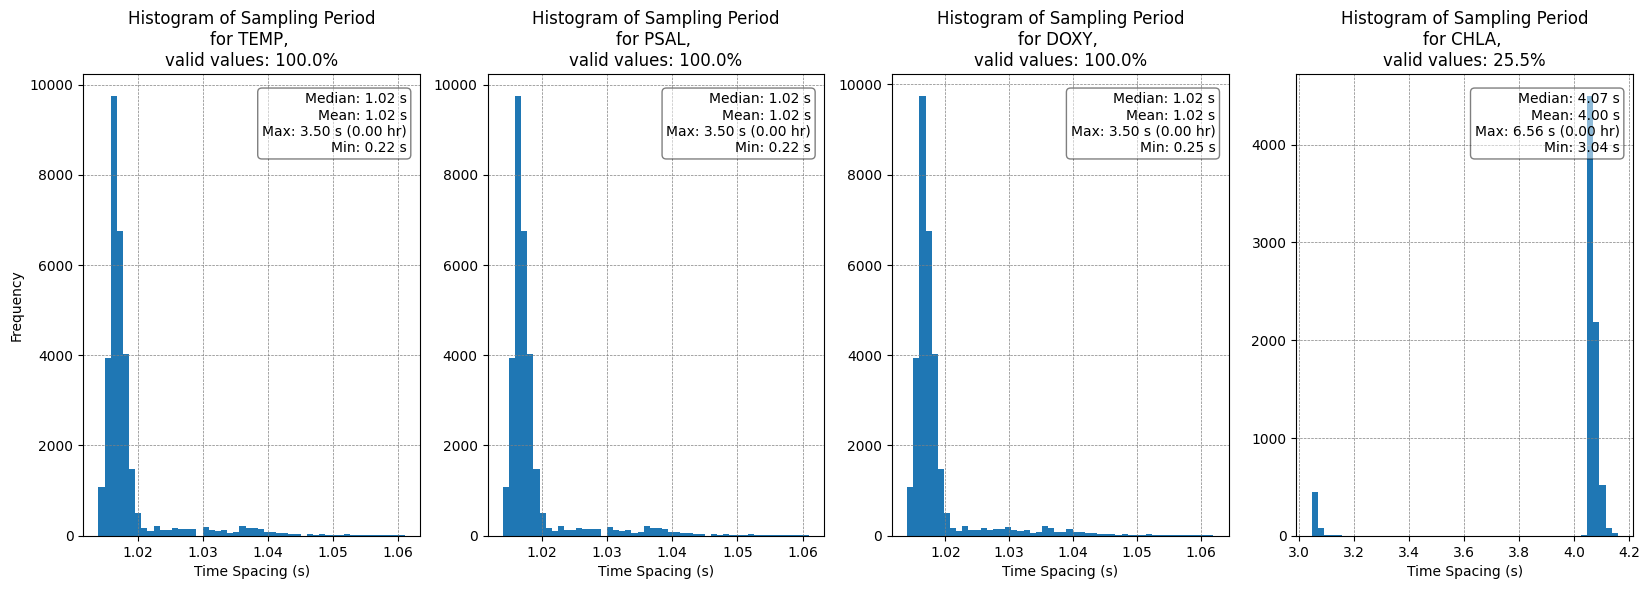

(<Figure size 2000x600 with 4 Axes>,
 array([<Axes: title={'center': 'Histogram of Sampling Period\nfor TEMP, \nvalid values: 100.0%'}, xlabel='Time Spacing (s)', ylabel='Frequency'>,
        <Axes: title={'center': 'Histogram of Sampling Period\nfor PSAL, \nvalid values: 100.0%'}, xlabel='Time Spacing (s)'>,
        <Axes: title={'center': 'Histogram of Sampling Period\nfor DOXY, \nvalid values: 100.0%'}, xlabel='Time Spacing (s)'>,
        <Axes: title={'center': 'Histogram of Sampling Period\nfor CHLA, \nvalid values: 25.5%'}, xlabel='Time Spacing (s)'>],
       dtype=object))

In [10]:
# Display the sampling period
plots.plot_sampling_period_all(ds)

Temperature and Salinity values have been filtered to the middle 99% of values.


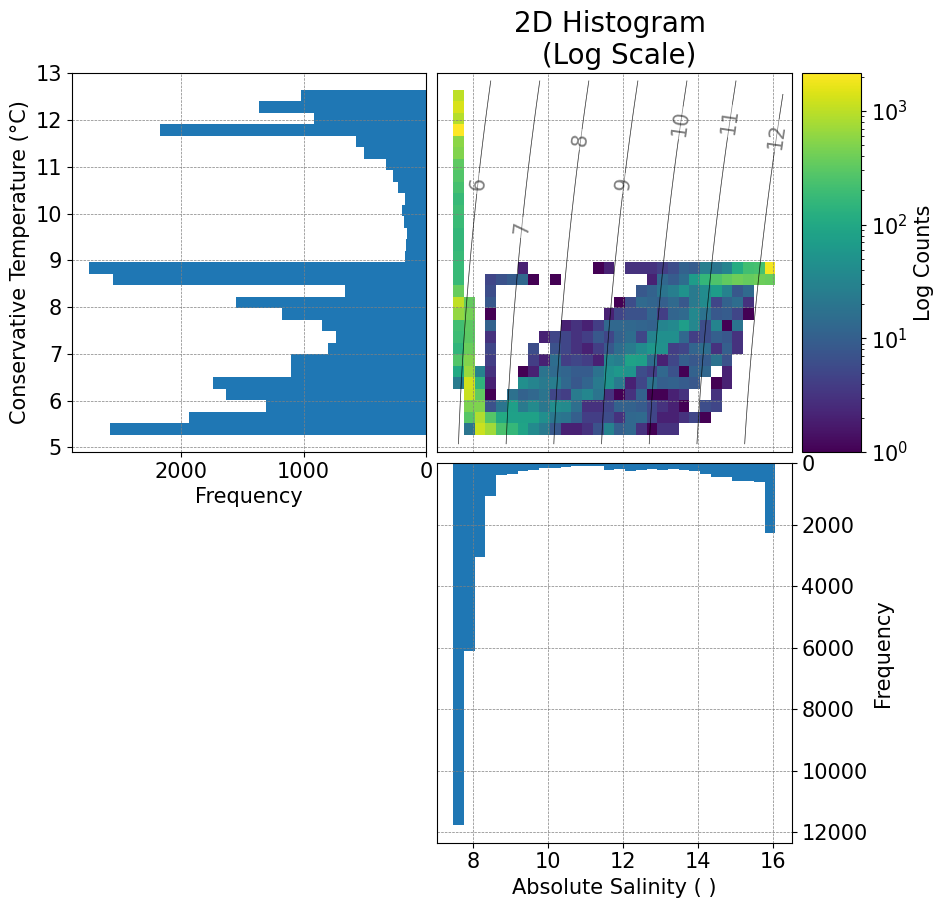

In [11]:
# Basic diagnostics of the watermass properties
fig, ax = plots.plot_ts(ds)

### Check PROFILE_NUMBER assignment

We want to check if the profile number is increasing monotonically or not.  The variable `PROFILE_NUMBER` is used to create an index of the profiles (dive and climb separately) within a glider dataset.  Since it is used in many of the plotting functions below, it is worth checking that there aren't obvious problems with the profile number assignment.

**Note:**
When using `pyglider` to assign the profile, there can be some issues if the correct pressure and time threshold is not chosen.
Users, based on their dataset will chose a specific `min_dp` and `profile_min_time` for the `get_profiles_new()`. If not chosen carefully, the function may struggle assigning a profile number (resulting in 0s in the middle of the dataset) or could split profiles when, for example, the glider get stuck on pycnoclne


In [ ]:
tools.check_monotony(ds.PROFILE_NUMBER)
plots.plot_prof_monotony(ds)

We can check for inconsistent profile duration as well which can highlight possible issues with how the profile number is assigned or weird navigation patterns

In [ ]:
duration = tools.compute_prof_duration(ds)
rolling_mean, overtime = tools.find_outlier_duration(duration,rolling=20, std=2)

fig, ax = plots.plot_outlier_duration(ds, rolling_mean, overtime, std=2)

### Check water column structure

This is a simple average of data variables within the glider dataset, to provide an overview of the data.

In [ ]:
fig, ax = plots.plot_basic_vars(ds,v_res=1, start_prof=0, end_prof=int(ds.PROFILE_NUMBER.max()))

### Check for bias between dives and climbs

Sensors on gliders may suffer from biases (offsets) between when a glider is diving vs climbing.   These plots average the dives and the climbs separately, to visualise whether a dataset may suffer from such a bias.

Note that there are two functions within `glidertest` which can be used to evaluate this bias: `plot_updown_bias()` uses a 2d gridding of the dataset, while `quant_binavg()` calculates a bin average of datapoints within a specified depth range.

See [OG1 description of phase](https://github.com/OceanGlidersCommunity/OG-format-user-manual/blob/main/vocabularyCollection/phase.md) for more information on `PHASE`.

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
plots.plot_updown_bias(tools.quant_updown_bias(ds, var='TEMP', v_res=1), ax[0],  xlabel='Temperature [C]')
plots.plot_updown_bias(tools.quant_updown_bias(ds, var='PSAL', v_res=1), ax[1],  xlabel='Salinity [PSU]')
plots.plot_updown_bias(tools.quant_updown_bias(ds, var='DOXY', v_res=1), ax[2],  xlabel='Dissolved Oxygen [mmol m-3]')
plots.plot_updown_bias(tools.quant_updown_bias(ds, var='CHLA', v_res=1), ax[3],  xlabel='Chlorophyll [mg m-3]')
ax[0].set_ylabel('Depth [m]')
plt.show()

## CTD

TBD.

Check for any thermal inertia related issues.

Salinity SOP provides a great summary of the needed processing of salinity data and the vaious difference based on sensor model and platform type https://oceangliderscommunity.github.io/Salinity_SOP/sections/salinity_dmqc.html

## Dissolved oxygen

*  Check for any possible drift in the data that might look suspicious. The great temporal and spatial variability may not allow for such check to be succesful. Evaluation using reference CTD cast data or any other data available in the study area is recommended.

In [ ]:
import gsw
o2sol = gsw.O2sol(ds.PSAL, ds.TEMP, ds.PRES, ds.LATITUDE, ds.LONGITUDE)
o2sat = 100 * ds.DOXY / o2sol
ds['DOXY_SAT']= o2sat

In [ ]:
plots.check_temporal_drift(ds, var='DOXY_SAT')

Oxygen SOP provides a great summary of the needed processing of oxygen data and the various difference based on sensor model and platform type https://oceangliderscommunity.github.io/Oxygen_SOP/sections/oxygen_rtqc.html

We will now apply the check recommended by the SOP:
1) Global range check
2) Outlier and spike check
3) Stuck value test
4) Effects of biofouling
5) Noise during night time at surface

We use some functions from IOOS QC qartod tools [https://github.com/ioos/ioos_qc/blob/main/ioos_qc/qartod.py]

In [ ]:
#1) Global range check
tools.compute_global_range(ds, var='DOXY', min_val=-5, max_val=600)
plots.plot_global_range(ds, var='DOXY', min_val=-5, max_val=600)

In [ ]:
#2) Outlier and spike check
spike = qartod.spike_test( ds.DOXY,
    suspect_threshold= 25,
    fail_threshold= 50,
    method = "average",)
fig, ax = plt.subplots()
fig,ax = plots.plot_ioosqc(spike,suspect_threshold= [25], fail_threshold= [50], title='Spike test DOXY', ax=ax)

In [ ]:
#3) Stuck value test
flat =qartod.flat_line_test(ds.DOXY,ds.TIME,1,2, 0.001)
fig, ax = plt.subplots()
fig, ax = plots.plot_ioosqc(flat,suspect_threshold= [0.01], fail_threshold=[0.1], title='Flat test DOXY',ax=ax)
plt.close()

stuck_data = np.where(flat>2) # When it is not good
perct = (len(stuck_data[0]) * 100) / len(flat)
if len(stuck_data[0]) != 0:
    perct_0 = (len(np.where(ds.DOXY[stuck_data] == 0)[0]) * 100) / len(stuck_data[0])
    text = f'{np.round(perct, 1)}% of data is identical to the next one. \n Of those values, {np.round(perct_0, 1)}% are 0s \n(this is relevant in case your glider surveys \nanoxic waters)'
ax.text(0.02, 0.6, text,fontsize=10, transform=ax.transAxes)

fig

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,9))
plots.check_temporal_drift(ds, var='DOXY_SAT', ax=[ax[0],ax[1]])
plt.close()
ax[0].set_ylim(80,110)
ax[1].set_ylim(20,-3)
ax[1].set_xlim(75,120)

fig

In [ ]:
# Check any noise at surface during night time
dayOS, nightOS = tools.compute_daynight_avg(ds, sel_var='DOXY_SAT')
plots.plot_daynight_avg( dayOS, nightOS, xlabel='Oxygen saturation')

##### Create a big figure with all those plots to have a sumamry

In [ ]:
fig, ax = plt.subplots(3,2 , figsize=(14,10))
plt.subplots_adjust(wspace=0.35, hspace=0.38)
ax=ax.flatten()

#Global range
plots.plot_global_range(ds, var='DOXY', min_val=-5, max_val=600, ax=ax[0])
plt.close()

#Stuck value test
plots.plot_ioosqc(flat,suspect_threshold= [0.01], fail_threshold=[0.1], title='Flat test DOXY',ax=ax[2])
plt.close()

#Spike test
plots.plot_ioosqc(spike,suspect_threshold= [25], fail_threshold= [50], title='Spike test DOXY',ax=ax[4])
plt.close()

# Check for issue due to biofouliing
plots.check_temporal_drift(ds, var='DOXY_SAT', ax=[ax[1],ax[3]])
plt.close()
ax[1].set_ylim(80,110)
ax[3].set_ylim(20,-3)
ax[3].set_xlim(75,120)

#Check for noise during the night
plots.plot_daynight_avg( dayOS, nightOS, ax=ax[5], xlabel='Oxygen saturation')
plt.close()
ax[5].set_ylim(20,-3)
ax[5].set_xlim(80,120)

fig


### Oxygen hysteresis

In [ ]:
df, diff, err, rms = tools.compute_hyst_stat(ds, var='DOXY', v_res=1)
fig, ax = plots.plot_hysteresis(ds, var='DOXY')

In [ ]:
if len(err.where(err>2).dropna())<2:
    print('No data has an percentage error above 2% when the difference between up and downcast is computed')
else:
    print(f'{int((100*len(err.where(err>2).dropna()))/len(err))}% of the data has a percentage error above 2 %. \nThe error reaches {int(np.nanmax(err))}% at {int(df.depth[np.where(err==np.nanmax(err))[0][0]])}m. \nThis may idicate data shows hysteresis. \nThe RMS between climb and dive data is {np.round(rms, 1)}')

## Bio-optics

### Chlorophyll fluorescence

*  Check bottom data and see if we have stable data that can be used for calibration. We also check stability of data to assess whether or not we have suspicious drift over the mission
* We check for any temporal drift when analysing the entire water column and not just the bottom data
* We then check if data is affected by non photochemical quenching (NPQ). NPQ is a physiological response to high light environments used by plants and algae to protect themselves from damage and causes an evident weakening in fluorescence signal during the day. With the `day_night_avg` function, we compute day and night averages of chlorophyll. We then plot a selected section of chlorophyll data with `plot_section_with_srss` to see if any NPQ effect in the top few meters is visible and then we plot a selcted day daily and night average to check again any NPQ effect with `plot_daynight_avg`.

(**Note:** The test mission had issues with FLBBCD as it stopped working few days into the mission and got flooded)

In [ ]:
plots.process_optics_assess(ds, var='CHLA');

In [ ]:
plots.check_temporal_drift(ds, var='CHLA')

In [ ]:
# Let's visually check a section of chlorphyll and see if we observe any NPQ
plots.plot_quench_assess(ds, 'CHLA', ax=None, ylim=35);

In [ ]:
# Compute day and night average for chlorophylla and temeparture
dayT, nightT = tools.compute_daynight_avg(ds, sel_var='TEMP')
dayS, nightS = tools.compute_daynight_avg(ds, sel_var='PSAL')
dayC, nightC = tools.compute_daynight_avg(ds, sel_var='CHLA')

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plots.plot_daynight_avg( dayT, nightT, ax[0], xlabel='Temperature [C]')
plots.plot_daynight_avg( dayS, nightS, ax[1], xlabel='Salinity [PSU]')
plots.plot_daynight_avg( dayC, nightC, ax[2], xlabel='Chlorophyll [mg m-3]')
plt.show()

Do we see any difference in chl between day and night? Can this just simply be explained by changes in water mass properties (different temp and salinity)?

#### Non photochemical quenching corrections

NPQ occurs only during the daytime, therefore when night measurements are available that are nearby in time and space,  they can be used to correct daytime profiles. Different methods exist for NPQ  correction. We recommend the paper by Thomalla et al. (2018) for a good overview on all possible methods. 

GliderTools (https://glidertools.readthedocs.io/en/latest/optics.html#quenching-correction) provides good tools for correction.

Thomalla, S. J., W. Moutier, T. J. Ryan-Keogh, L. Gregor, and J. Schütt. 2018. An optimized 
method for correcting fluorescence quenching using optical backscattering on autonomous 
platforms. Limnology and Oceanography: Methods, 16: 132-144. DOI: 
https://doi.org/10.1002/lom3.10234

### Optical Backscatter

*  Check bottom data and see if we have stable data that can be used for calibration. We also check stability of data to assess whether or not we have suspicious drift over the mission
* We check for any temporal drift when analysing the entire water column and not just the bottom data
* In case computation of particle backscattering from the scaled optical data was not done, this can be done following a function from GliderTools. this functions uses uses the coefficients from Zhang et al. (2009) to convert the raw counts into total backscatter (m-1), correcting for temperature and salinity. The $\chi$ factor and $\theta$ in this example were taken from Sullivan et al. (2013) and Slade & Boss (2015).

Slade, W., Boss, E. 2015. Spectral attenuation and backscattering as indicators of average particle size. Applied Optics 54: 7264-7277, doi:10.1364/AO.54.00726. 

Sullivan, J., Twardowski, M., Zaneveld, J.R.V., Moore, C. 2013. Measuring optical backscattering in water. Light Scattering Reviews 7. 189-224. 10.1007/978-3-642-21907-8_6.

Zhang, X., and L. Hu. 2009. Estimating scattering of pure water from density fluctuation of the 
refractive index. Optics Express, 17: 1671-1678. DOI: 10.1364/OE.17.001671 7

In [ ]:
plots.process_optics_assess(ds, var='BBP700');

## Photosyntetically Active Radiation (PAR)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plots.plot_updown_bias(tools.quant_updown_bias(ds, var='DPAR', v_res=1), ax,  xlabel='Irradiance')
plt.show()

Do we notice any strong up down cast bias?

Likely we do as the diving angle changes. The pitch for upcast and downcast are very different while the position of the sensor remains the same. This means that the angle at which the sensor is exposed to light is very different and data will not be comparable. Furthermore, navigation patterns have to be considered too when processing PAR data. As the glider sits at surface, the pitch (therefore the sensor angle) can be very different from the rest of the dive. Moreover, as the glider starts to dive or prepares for surfacing during a climb the pitch may be very different as well.

Discarding and reconstructing algebraically the surface PAR using an exponential equation and selecting data from only up or downcast is therefore recommended. GliderTools provides great examples and functions to address this issues (https://glidertools.readthedocs.io/en/latest/optics.html#par-replacement)

## Vertical velocity

Vertical seawater velocity can be calculated from glider T&S data using the flight model.  Note, the variables for glider flight from the flight model (`GLIDER_VERT_VELO_MODEL`) must be present in the dataset already.  

In [ ]:
# Load glider dataset with vertical velocity parameters
ds_sg014 = fetchers.load_sample_dataset(dataset_name="sg014_20040924T182454_delayed_subset.nc") # Subset of a full Seaglider mission in the Labrador Sea

# Calculate vertical seawater velocity 
# First, calculate the vertical speed of the glider from the depth data
ds_sg014 = tools.calc_w_meas(ds_sg014)

# Next, calculate the vertical seawater speed by differencing the DZDT data and the modelled vertical glider speed
ds_sg014 = tools.calc_w_sw(ds_sg014)

# Plot about 20 profiles to see the behaviour of the flight model
start_prof = 400
end_prof = 420
plots.plot_vertical_speeds_with_histograms(ds_sg014, start_prof, end_prof);

In [ ]:
# One way to characterise the flight model performance is to look at the average
# vertical seawater velocity for climbs and for dives.  This uses a bin average of the original
# data on time intervals, and PHASE to separate dives from climbs

# Dive climb bias in the vertical speed
# Separate dives and climbs using the PHASE variable, PHASE=2 is a dive, PHASE=1 is a climb
ds_dives = ds_sg014.sel(N_MEASUREMENTS=ds_sg014.PHASE == 2)
ds_climbs = ds_sg014.sel(N_MEASUREMENTS=ds_sg014.PHASE == 1)

# Calculate bin averages
ds_out_dives = tools.quant_binavg(ds_dives, var = 'VERT_CURR_MODEL', dz=10)
ds_out_climbs = tools.quant_binavg(ds_climbs, var = 'VERT_CURR_MODEL', dz=10)

# Plot the profiles (compare to Fig 3 and Fig 4 in Frajka-Williams et al. 2011)
plots.plot_combined_velocity_profiles(ds_out_dives, ds_out_climbs)

## Modify plots and make changes to the default style

Here we demonstrate the flexibility of the functions returning fig, ax in the notebook 
e.g. changing a plot title/axis labels, resizing the plot, saving it in a specific figure format, adding an extra label/subplot etc.

In [ ]:
fig_track, ax_track = plots.plot_glider_track(ds)

#### We want this map to be a bit smaller, change the title, and add a box with my study area

In [ ]:
from matplotlib.patches import Rectangle
fig_track.set_size_inches(7,7)
ax_track.set_title('My mission - Glider track', fontsize=14)
ax_track.add_patch(Rectangle((15.9, 55.2), 0.3, 0.3, facecolor="none", ec='r', lw=2))
ax_track.text(15.86, 55.6,'Study area')
fig_track

#### Now we want a figure to show how oxygen is performing

We want to combine the oxygen hysteresis plot and the oxygen drift plot

In [ ]:
figure = plt.figure(figsize=(18,10))

ax1=plt.subplot(5, 5, 1)
ax2=plt.subplot(5, 5, 2)
ax3=plt.subplot(5, 5, 3)
ax4=plt.subplot(4, 2, 3)
ax5=plt.subplot(2, 5, 4)
ax6=plt.subplot(2, 5, 5)
plt.close()
plots.check_temporal_drift(ds, var='DOXY',ax=[ax5,ax6])
plt.close()
plots.plot_hysteresis(ds, var='DOXY', v_res=1, perct_err=2, ax=[ax1,ax2,ax3,ax4])
plt.close()

In [ ]:
figure

#### Now we want to combine the map showing where the glider was the T/S plot and the histograms of time and space spacing

In [ ]:
import cartopy.crs as ccrs
figure = plt.figure(figsize=(20,20))

ax1=plt.subplot(5, 5, 1)
ax2=plt.subplot(5, 5, 2)
ax3=plt.subplot(5, 5, 3)
ax4=plt.subplot(5, 5, 4)
ax5=plt.subplot(5, 5, 5)
ax6=plt.subplot(5, 5, 8)
ax7=plt.subplot(5, 5, 9)
ax8=plt.subplot(5, 5, 10)
ax9=plt.subplot(1,5,3,projection=ccrs.PlateCarree())
plt.close()

In [ ]:


figts, ax_ts = plots.plot_ts(ds, axs=[ax3, ax4, ax5, ax6,ax7,ax8])
plt.close()
grid, ax_grid = plots.plot_grid_spacing(ds, ax=[ax1, ax2])
plt.close()
tr, ax_track = plots.plot_glider_track(ds, ax=ax9)
plt.close()

In [ ]:
figure

##### We want to resize this figure
1) Reposition the histograms and colorbar in the T/S plot
2) Resize the map to cover more space
3) Reposition the spacing histograms and make legends smaller

In [ ]:
# 1) Reposition the histograms and colorbar in the T/S plot
# Move the first histogram a bit to the right
box_hts1 = ax3.get_position()
ax3.set_position([box_hts1.x0+0.065,box_hts1.y0,box_hts1.width,box_hts1.height])
# Move the second histogram a bit up
box_hts2 = ax7.get_position()
ax7.set_position([box_hts2.x0+0.042,box_hts2.y0+0.023,box_hts2.width,box_hts2.height])
# Move the colorbar to the left
box_cts = ax5.get_position()
ax5.set_position([box_cts.x0+0.02,box_cts.y0,box_cts.width,box_cts.height])
# Move the colorbar to the left
box_ts = ax4.get_position()
ax4.set_position([box_ts.x0+0.042,box_ts.y0,box_ts.width,box_ts.height])

figure

In [ ]:
# 3) Add space between the two 'spacing' histograms
box_h1 = ax1.get_position()
ax1.set_position([box_h1.x0-0.02,box_h1.y0,box_h1.width,box_h1.height])
# Move the second histogram a bit up
box_h2 = ax2.get_position()
ax2.set_position([box_h2.x0+0.02,box_h2.y0,box_h2.width,box_h2.height])

figure

In [ ]:
# 2) Resize the map to cover more area
box_map = ax9.get_position()
shift_dist = 10
ax9.set_position([box_map.x0 - shift_dist, box_map.y0-0.15, box_map.width + shift_dist, box_map.height*3.9])

figure